### Import thư viện

In [62]:
import numpy as np
from underthesea import word_tokenize
import tensorflow as tf
import re
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers

### Load dữ liệu

In [63]:
with open("./data2.txt", "r", encoding="utf-8") as file:
    data = file.read()

print(data)

Báo cáo tự đánh giá (TĐG) là một phần của quá trình đảm bảo chất lượng đào tạo tại Khoa X.
Báo cáo này bao gồm 03 phần chính
Khái quát nhằm mô tả vắn tắt về Báo cáo TĐG, quá trình TĐG và giới thiệu vắn tắt về, Khoa X
Phần TĐG theo tiêu chuẩn tiêu chí đối với chương trình đào tạo Ngành X theo Bộ tiêu chuẩn đánh giá chất lượng CTĐT của Bộ Giáo dục và Đào tạo ban hành tại Thông tư 04/2016/TT-GDĐT ngày 14/3/2016
Kết luận: Tóm tắt những điểm mạnh, Tóm tắt điểm tồn tại và những vấn đề cần cải tiến chất lượng, Kế hoạch cải tiến chất lượng của CTĐT ngành X và tổng hợp kết quả TĐG
Cuối bản báo cáo là Phụ lục: gồm các tài liệu như các quyết định thành lập Hội đồng TĐG và nhóm viết Báo cáo TĐG, kế hoạch TĐG CTĐT ngành X, cơ sở dữ liệu đánh giá CTĐT và danh mục các minh chứng
Báo cáo đã nêu rõ mục tiêu của CTĐT cử nhân ngành X là: “Đào tạo nguồn nhân lực có khả năng phân tích, tư vấn, thiết kế, phát triển và triển khai, vận hành các hệ thống thông tin (X) để giải quyết các vấn đề trong kinh tế, q

Tokenize

In [ ]:
def word_separation(input_data):
    data = input_data.split('\n')
    token_underthesea = []
    sentences = []

    for sentence in data:
        text = re.sub(r'[^a-zA-Z0-9\sđĐáÁàÀảẢãÃạẠăĂắẮằẰẳẲẵẴạẠâÂấẤầẦẩẨẫẪậẬêÊếẾềỀểỂễỄệỆôÔốỐồỒổỔỗỖộỘơƠớỚờỜởỞỡỠợỢưƯứỨừỪửỬữỮựỰơƠáÁàÀảẢãÃạẠéÉèÈẻẺẽẼếẾềỀểỂễỄếẾêÊấẤầẦẩẨẫẪậẬíÍìÌỉỈĩĨịỊóÓòÒỏỎõÕọỌốỐồỒổỔỗỖộỘơƠớỚờỜởỞỡỠợỢúÚùÙủỦũŨụỤưỪỨừỪửỬữỮựỰýÝỳỲỷỶỹỸỵỴ\s]+', '', sentence).lower()
        sentences.append(text)

        # Tách từ bằng Underthesea
        # tokens_underthesea = text.split()
        tokens_underthesea = word_tokenize(text)
        token_underthesea.append(tokens_underthesea)

    return token_underthesea, sentences

token_underthesea, train_input = word_separation(data)

In [ ]:
print(token_underthesea[:3])

[['báo cáo', 'tự', 'đánh giá', 'tđg', 'là', 'một', 'phần', 'của', 'quá trình', 'đảm bảo', 'chất lượng', 'đào tạo', 'tại', 'khoa', 'x'], ['báo cáo', 'này', 'bao', 'gôm', '03', 'phần', 'chính'], ['khái quát', 'nhằm', 'mô tả', 'vắn tắt', 'về', 'báo cáo', 'tđg', 'quá trình', 'tđg', 'và', 'giới thiệu', 'vắn tắt', 'về', 'khoa', 'x']]


In [ ]:
train_input[:3]

['báo cáo tự đánh giá tđg là một phần của quá trình đảm bảo chất lượng đào tạo tại khoa x',
 'báo cáo này bao gôm 03 phần chính',
 'khái quát nhằm mô tả vắn tắt về báo cáo tđg quá trình tđg và giới thiệu vắn tắt về khoa x']

Tạo bộ từ điển

In [ ]:
# Xây dựng bộ từ điển từ danh sách token

def build_vocab(token_underthesea):
    vocab = {}
    for token in token_underthesea:
        for word in token:
            if word not in vocab:
                vocab[word] = len(vocab) + 1
    return vocab


vocab = build_vocab(token_underthesea)
print(vocab)
print("Số lượng từ trong bộ từ điển:", len(vocab))

{'báo cáo': 1, 'tự': 2, 'đánh giá': 3, 'tđg': 4, 'là': 5, 'một': 6, 'phần': 7, 'của': 8, 'quá trình': 9, 'đảm bảo': 10, 'chất lượng': 11, 'đào tạo': 12, 'tại': 13, 'khoa': 14, 'x': 15, 'này': 16, 'bao': 17, 'gôm': 18, '03': 19, 'chính': 20, 'khái quát': 21, 'nhằm': 22, 'mô tả': 23, 'vắn tắt': 24, 'về': 25, 'và': 26, 'giới thiệu': 27, 'theo': 28, 'tiêu chuẩn': 29, 'tiêu chí': 30, 'đối với': 31, 'chương trình': 32, 'ngành': 33, 'bộ': 34, 'ctđt': 35, 'giáo dục': 36, 'ban hành': 37, 'thông tư': 38, '042016': 39, 'ttgdđt': 40, 'ngày': 41, '1432016': 42, 'kết luận': 43, 'tóm tắt': 44, 'những': 45, 'điểm': 46, 'mạnh tóm': 47, 'tắt điểm': 48, 'tồn tại': 49, 'vấn đề': 50, 'cần': 51, 'cải tiến': 52, 'kế hoạch': 53, 'tổng hợp': 54, 'kết quả': 55, 'cuối': 56, 'bản': 57, 'phụ lục': 58, 'gồm': 59, 'các': 60, 'tài liệu': 61, 'như': 62, 'quyết định': 63, 'thành lập': 64, 'hội đồng': 65, 'nhóm': 66, 'viết': 67, 'cơ sở dữ liệu': 68, 'danh mục': 69, 'minh chứng': 70, 'đã': 71, 'nêu': 72, 'rõ': 73, 'mục t

In [ ]:
# Số hóa các câu đầu vào
def word_embedding(token_underthesea):
    digitized_sentences = []
    for sentence in token_underthesea:
        digitized_sentence = [vocab[word] for word in sentence if word in vocab]
        digitized_sentences.append(digitized_sentence)
    return digitized_sentences

input_sequences = word_embedding(token_underthesea)
print(input_sequences[:5])

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [1, 16, 17, 18, 19, 7, 20], [21, 22, 23, 24, 25, 1, 4, 9, 4, 26, 27, 24, 25, 14, 15], [7, 4, 28, 29, 30, 31, 32, 12, 33, 15, 28, 34, 29, 3, 11, 35, 8, 34, 36, 26, 12, 37, 13, 38, 39, 40, 41, 42], [43, 44, 45, 46, 47, 48, 49, 26, 45, 50, 51, 52, 11, 53, 52, 11, 8, 35, 33, 15, 26, 54, 55, 4]]


In [ ]:
# Tìm câu dài nhất
max_sequence_length = max([len(seq) for seq in input_sequences])
print("Câu có số ký tự dài nhất là: ", max_sequence_length)

Câu có số ký tự dài nhất là:  176


### Chuẩn bị dữ liệu đầu vào

In [ ]:
def convert(input_sequences):
    # Chuyển đổi dữ liệu thành chuỗi
    data_strings = [" ".join(map(str, sequence)) for sequence in input_sequences]
    # Chuyển dữ liệu thành mảng array
    data_np_arr = np.array(data_strings, dtype=np.str)
    return data_np_arr

data_np = convert(input_sequences)
print(data_np[:5])

['1 2 3 4 5 6 7 8 9 10 11 12 13 14 15' '1 16 17 18 19 7 20'
 '21 22 23 24 25 1 4 9 4 26 27 24 25 14 15'
 '7 4 28 29 30 31 32 12 33 15 28 34 29 3 11 35 8 34 36 26 12 37 13 38 39 40 41 42'
 '43 44 45 46 47 48 49 26 45 50 51 52 11 53 52 11 8 35 33 15 26 54 55 4']


C:\Users\ductr\AppData\Local\Temp\ipykernel_10948\2756344403.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_np_arr = np.array(data_strings, dtype=np.str)


In [ ]:
# Chuẩn bị lớp TextVectorization

sequence_length = max_sequence_length
vocab_size = 50

custom_text_vectorization = TextVectorization(
    max_tokens = vocab_size, # Số từ mà mà mô hình học sẽ liên quan cao đến nhau
    output_mode = 'int',
    output_sequence_length = sequence_length # đầu ra tối đa của câu
)
custom_text_vectorization.adapt(data_np)

# Tạo tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices(data_np)
batch_size = 16
batched_dataset = dataset.batch(batch_size)

for batch in batched_dataset.take(2):           # In một vài batch để kiểm tra
    print(batch)

tf.Tensor(
[b'1 2 3 4 5 6 7 8 9 10 11 12 13 14 15' b'1 16 17 18 19 7 20'
 b'21 22 23 24 25 1 4 9 4 26 27 24 25 14 15'
 b'7 4 28 29 30 31 32 12 33 15 28 34 29 3 11 35 8 34 36 26 12 37 13 38 39 40 41 42'
 b'43 44 45 46 47 48 49 26 45 50 51 52 11 53 52 11 8 35 33 15 26 54 55 4'
 b'56 57 1 5 58 59 60 61 62 60 63 64 65 4 26 66 67 1 4 53 4 35 33 15 68 3 35 26 69 60 70'
 b'1 71 72 73 74 8 35 75 33 15 5 12 76 77 78 79 80 81 82 83 26 84 85 60 86 87 15 88 89 60 50 90 91 92 93 94 26 78 95 96 97 88 98 99 100 25 101 11 102 90 103 104 105 106'
 b'107 108 109 8 35 33 15 110 111 112 113 114 111 60 115 116 26 115 117 118 119 90 120 121 122 8 60 123 90 35 33 15 124 125 126 127 126 128 129 26 126 129'
 b'90 130 131 126 111 132 133 126 116 126 28 134 126 28 125 33 126 66 33 26 126 33 131 135 111 132 136 137 135 138 59 135 139 135 140 85 93 60 15 135 141 86 135 142 143 144 26 145 146 60 147 148 25 149 150 111 132 136 137 149 150 151 149 150 100 26 149 150 139'
 b'152 153 74 26 109 8 35 71 111 112 113 154 1

In [ ]:
def prepare_lm_dataset(text_batch):
    vectorized_sequences = custom_text_vectorization(text_batch)
    x = vectorized_sequences[:, :-1]
    y = vectorized_sequences[:, 1:]
    return x, y

lm_dataset = batched_dataset.map(prepare_lm_dataset, num_parallel_calls=4)

In [ ]:
# Chia dữ liệu

val_size = 0.3

val_steps = int(val_size * lm_dataset.cardinality().numpy())
train_steps = lm_dataset.cardinality().numpy() - val_steps

val_dataset = lm_dataset.take(val_steps)
train_dataset = lm_dataset.skip(val_steps)

### Khởi tạo model transformer và seq2seq

In [ ]:
# Model kết hợp giữa transformer và seq2seq

class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config

class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
          num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(
          num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dropout(0.3),
             layers.Dense(embed_dim)]
        )

        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def get_config(self):
        config = super(TransformerDecoder, self).get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1),
             tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(
                mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)
        else:
            padding_mask = mask
        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask)
        attention_output_1 = self.layernorm_1(inputs + attention_output_1)
        attention_output_2 = self.attention_2(
            query=attention_output_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        attention_output_2 = self.layernorm_2(attention_output_1 + attention_output_2)
        proj_output = self.dense_proj(attention_output_2)
        return self.layernorm_3(attention_output_2 + proj_output)

In [ ]:
# A simple Transformer-based language model

embed_dim = 256
latent_dim = 1024
num_heads = 2

inputs = keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, x)
outputs = layers.Dense(vocab_size, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 positional_embedding_1 (Po  (None, None, 256)            57856     ['input_2[0][0]']             
 sitionalEmbedding)                                                                               
                                                                                                  
 transformer_decoder_1 (Tra  (None, None, 256)            1579264   ['positional_embedding_1[0][0]
 nsformerDecoder)                                                   ',                            
                                                                     'positional_embedding_1

In [ ]:
# Khởi tạo callback để lưu lại trọng số tốt nhất
checkpoint = ModelCheckpoint("./src/best_model_v4.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Training model 
model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history=model.fit(train_dataset, 
                  epochs=60, 
                  validation_data=val_dataset, 
                  callbacks=[checkpoint])

Epoch 1/60

145/145 [==============================] - ETA: 0s - loss: 2.1169 - accuracy: 0.5683
Epoch 1: val_accuracy improved from -inf to 0.54974, saving model to ./src\best_model_v4.hdf5
145/145 [==============================] - 24s 151ms/step - loss: 2.1169 - accuracy: 0.5683 - val_loss: 2.4087 - val_accuracy: 0.5497
Epoch 2/60


c:\Users\ductr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


145/145 [==============================] - ETA: 0s - loss: 1.9705 - accuracy: 0.5758
Epoch 2: val_accuracy did not improve from 0.54974
145/145 [==============================] - 22s 149ms/step - loss: 1.9705 - accuracy: 0.5758 - val_loss: 2.3345 - val_accuracy: 0.4851
Epoch 3/60
145/145 [==============================] - ETA: 0s - loss: 1.9201 - accuracy: 0.5766
Epoch 3: val_accuracy did not improve from 0.54974
145/145 [==============================] - 19s 134ms/step - loss: 1.9201 - accuracy: 0.5766 - val_loss: 2.3433 - val_accuracy: 0.4366
Epoch 4/60
145/145 [==============================] - ETA: 0s - loss: 1.8795 - accuracy: 0.5802
Epoch 4: val_accuracy did not improve from 0.54974
145/145 [==============================] - 22s 151ms/step - loss: 1.8795 - accuracy: 0.5802 - val_loss: 2.3426 - val_accuracy: 0.4259
Epoch 5/60
144/145 [============================>.] - ETA: 0s - loss: 1.8484 - accuracy: 0.5816
Epoch 5: val_accuracy did not improve from 0.54974
145/145 [============

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

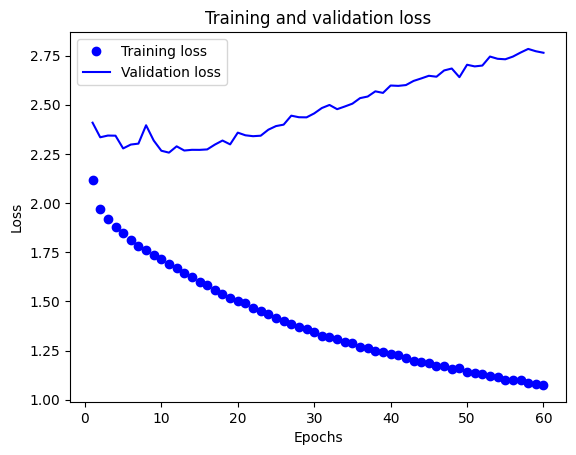

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

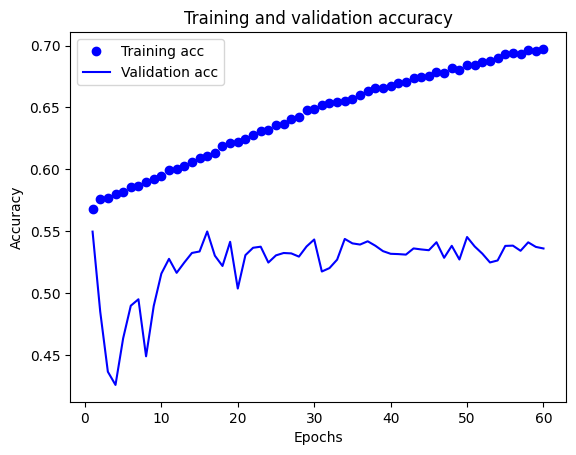

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Đọc model và dự đoán

In [65]:
import h5py
from keras.models import load_model
import numpy as np

# Định nghĩa custom objects cho việc load model
custom_objects = {'PositionalEmbedding': PositionalEmbedding, 'TransformerDecoder': TransformerDecoder}

# Load mô hình từ tệp HDF5
with h5py.File("./src/best_model_v3.hdf5", "r") as file:
    model_from_memory = load_model(file, custom_objects=custom_objects)

In [66]:
# # Tạo một từ điển để ánh xạ từ chỉ mục của từ về từ thực tế
# tokens_index = dict(enumerate(custom_text_vectorization.get_vocabulary()))

# def sample_next(predictions, temperature=1.0):
#     predictions = np.asarray(predictions).astype("float64")
#     predictions = np.log(predictions) / temperature
#     exp_preds = np.exp(predictions)
#     predictions = exp_preds / np.sum(exp_preds)
#     probas = np.random.multinomial(1, predictions, 1)
#     return np.argmax(probas)

# def predict_next_sentence(keyword, max_length, temp=1.0):
#     input_sentence = keyword
#     generated_sentence = keyword
#     for _ in range(max_length):
#         tokenized_sentence = custom_text_vectorization([input_sentence])
#         predictions = model_from_memory.predict(tokenized_sentence, verbose=0)
#         vectorized_prompt = custom_text_vectorization([input_sentence])[0].numpy()
#         prompt_length = np.nonzero(vectorized_prompt == 0)[0][0]
#         next_token = sample_next(predictions[0, prompt_length - 1, :], temp)
#         sampled_token = tokens_index[next_token]
#         if sampled_token == "<END>":
#             break
#         generated_sentence += " " + sampled_token
#         input_sentence = generated_sentence

#     return generated_sentence

# # Sử dụng hàm để dự đoán câu văn dựa trên từ khóa
# keyword = "Các thông tin về"
# for _ in range(3):
#     predicted_sentence = predict_next_sentence(keyword, max_length=10, temp=1)
#     data_words = predicted_sentence.split()
#     result_indices = [int(word) for word in data_words if word.isdigit()]
#     # Ánh xạ các chỉ mục từ bộ từ điển thành từ thực tế
#     result_words = [list(vocab.keys())[list(vocab.values()).index(idx)] for idx in result_indices]
#     # Kết hợp các từ để tạo thành câu văn
#     result_sentence = (keyword + " " + " ".join(result_words))
#     print(result_sentence)

In [69]:
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu


# Tạo một từ điển để ánh xạ từ chỉ mục của từ về từ thực tế
tokens_index = dict(enumerate(custom_text_vectorization.get_vocabulary()))

def sample_next(predictions, temperature=1.0):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, predictions, 1)
    return np.argmax(probas)

def predict_next_sentence(keyword, max_length, temp=1.0):
    input_sentence = keyword
    generated_sentence = keyword
    for _ in range(max_length):
        tokenized_sentence = custom_text_vectorization([input_sentence])
        predictions = model_from_memory.predict(tokenized_sentence, verbose=0)
        vectorized_prompt = custom_text_vectorization([input_sentence])[0].numpy()
        prompt_length = np.nonzero(vectorized_prompt == 0)[0][0]
        next_token = sample_next(predictions[0, prompt_length - 1, :], temp)
        sampled_token = tokens_index[next_token]
        if sampled_token == "<END>":
            break
        generated_sentence += " " + sampled_token
        input_sentence = generated_sentence

    return generated_sentence

def custom_metric(reference, predicted):
    # Example of a custom metric: calculate the average length difference between reference and predicted sentences
    ref_lengths = [len(ref.split()) for ref in reference]
    pred_lengths = len(predicted.split())
    avg_length_diff = np.mean(np.abs(np.array(ref_lengths) - pred_lengths))
    return avg_length_diff

def calculate_bleu(reference, predicted, weights):
    reference_tokens = [ref.split() for ref in reference]  # Convert each reference sentence to tokens
    predicted_tokens = predicted.split()
    bleu_score = corpus_bleu([reference_tokens], [predicted_tokens], weights=weights)
    return bleu_score

# Sử dụng hàm để dự đoán câu văn dựa trên từ khóa và đánh giá BLEU Score
keyword = "Các thông tin về"
for _ in range(3):
    predicted_sentence = predict_next_sentence(keyword, max_length=100, temp=1)
    data_words = predicted_sentence.split()
    result_indices = [int(word) for word in data_words if word.isdigit()]
    result_words = [list(vocab.keys())[list(vocab.values()).index(idx)] for idx in result_indices]
    result_sentence = (keyword + " " + " ".join(result_words))
    
    # Đây là một ví dụ câu tham chiếu, bạn cần thay thế bằng câu thực tế của mình
    reference_sentence = ["Các thông tin về nguồn học liệu (tài liệu tham khảo bắt buộc và tài liệu tham khảo khuyến khích)",
                          "các thông tin về CTĐT và đề cương học phần trong CTĐT cũng được công bố công khai thông qua một số các hình thức khác như các tài liệu phục vụ cho hoạt động tuyển sinh, cẩm nang tư vấn tuyển sinh, tờ rơi quảng bá tuyển sinh",
                          "các thông tin về mục tiêu của học phần, chuẩn năng lực, mô tả tóm tắt nội dung học phần, kế hoạch và nội dung giảng dạy của học phần, phương pháp và hình thức dạy học, danh mục tài liệu tham khảo của học phần, phương pháp, và hình thức KTĐG",
                          "Các thông tin về các hoạt động của Khoa được cập nhật thường xuyên trên Website của Khoa."]
    
    # Example BLEU-1, BLEU-2, BLEU-3 calculation
    bleu_score_1 = calculate_bleu(reference=reference_sentence, predicted=result_sentence, weights=[1.0, 0, 0, 0])
    bleu_score_2 = calculate_bleu(reference=reference_sentence, predicted=result_sentence, weights=[0, 1.0, 0, 0])
    bleu_score_3 = calculate_bleu(reference=reference_sentence, predicted=result_sentence, weights=[0.5, 0.5, 0, 0])
    
    # Calculate the custom metric
    custom_metric_value = custom_metric(reference=reference_sentence, predicted=result_sentence)
    
    print("Predicted:", result_sentence)
    print('BLEU-1: %f' % bleu_score_1)
    print('BLEU-2: %f' % bleu_score_2)
    print('BLEU-3: %f' % bleu_score_3)
    print('Custom Metric: %f' % custom_metric_value)
    print("---")

Predicted: Các thông tin về học tập các có nhà trường x trường và của kỹ năng gv kiến thức tổ chức tốt nghiệp các khoa kỹ năng và và
BLEU-1: 0.448276
BLEU-2: 0.107143
BLEU-3: 0.219156
Custom Metric: 15.750000
---
Predicted: Các thông tin về phần từ và của nhà trường được năm hỗ trợ phần có x về năm được đã ngành và của chất lượng ngành
BLEU-1: 0.370370
BLEU-2: 0.115385
BLEU-3: 0.206725
Custom Metric: 15.750000
---
Predicted: Các thông tin về học tập các có với được có khoa ctđt nhà trường trong sinh viên
BLEU-1: 0.500000
BLEU-2: 0.176471
BLEU-3: 0.297044
Custom Metric: 16.750000
---
